In [38]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape)
print("Label Data Shape" , digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


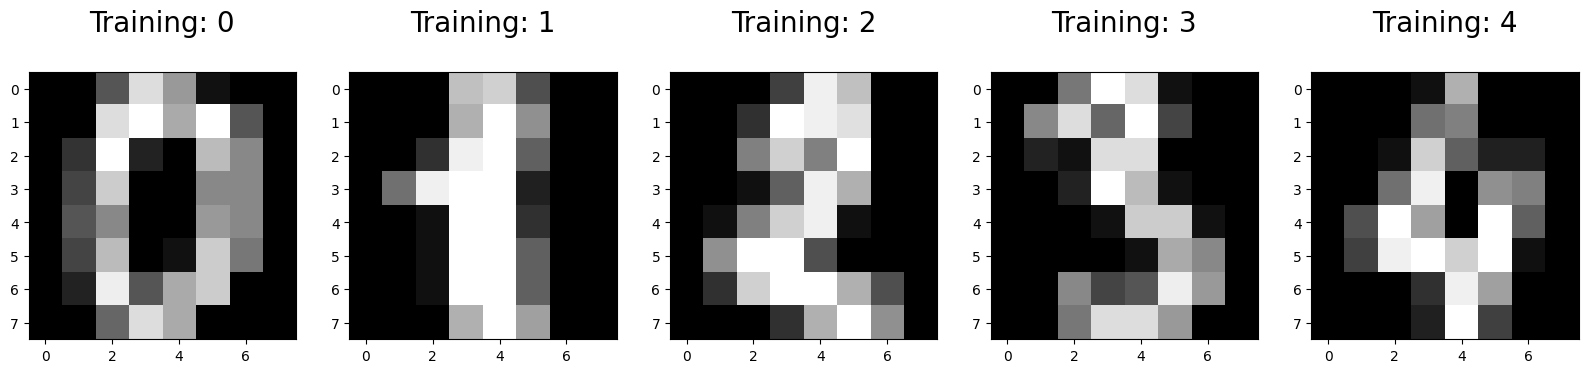

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)) , cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label , fontsize=20)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(digits.data , digits.target , test_size=0.25 , random_state=0)

from sklearn.linear_model import LogisticRegression
#logisticRegr = LogisticRegression(solver='liblinear')
logisticRegr = LogisticRegression(solver='liblinear')
logisticRegr.fit(x_train , y_train)

LogisticRegression(solver='liblinear')

In [41]:
logisticRegr.predict(x_test[0].reshape(1,-1)) #1행으로 지정 후 자동으로 열을 결정
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [42]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test,y_test)
print(score)

0.9533333333333334


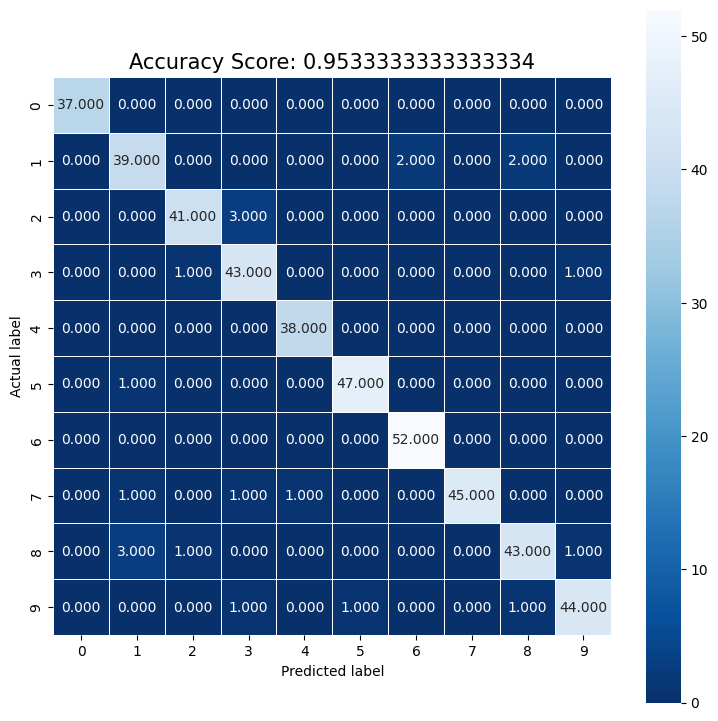

In [43]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True , fmt=".3f" , linewidths=.5 , square =True , cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score) 
plt.title(all_sample_title,size=15);
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(
    confusion_matrix(y_test,predictions),
    columns = ['p0' ,'p1','p2','p3','p4','p5','p6','p7','p8','p9'],
    index = ['0' ,'1','2','3','4','5','6','7','8','9']
)

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9
0,37,0,0,0,0,0,0,0,0,0
1,0,39,0,0,0,0,2,0,2,0
2,0,0,41,3,0,0,0,0,0,0
3,0,0,1,43,0,0,0,0,0,1
4,0,0,0,0,38,0,0,0,0,0
5,0,1,0,0,0,47,0,0,0,0
6,0,0,0,0,0,0,52,0,0,0
7,0,1,0,1,1,0,0,45,0,0
8,0,3,1,0,0,0,0,0,43,1
9,0,0,0,1,0,1,0,0,1,44
